# Pose Config Handbook for Augmentation-related Parameters 

Hello! Mabuhay! Hola!
In this notebook, we will have a rundown on the following pose config parameters related to data augmentation:


# Outline
1. [Goal](#Goal) 
2. [What is data augmentation?](#What-+-is-+-data-+-augmentation?)
3. [Deep-dive into the augmentation-related parameters](#Deep-dive-+-into-+-the-+-augmentation-related-+-parameters)
    1. [Geometric](#geometric)  
        1. [Scale and scale jittering](#scaling)  
        2. [Rotation](#rotation)  
        3. [Flip](#flip)  
        4. [Crop](#crop)  
    2. [Kernel](#kernel)  
        1. [Sharpening](#sharp)  
        2. [Edge Enhancement](#edge)  
5. [Final comments](#Final-+-comments)


# 1. Goal 
<a id="Goal"></a>
By the end of this short lesson, you should have a little bit more understanding of how to play around with the data augmentation-related parameters and tweak it further to fit your dataset.

# 2. What is data augmentation?
<a id="What-+-is-+-data-+-augmentation?"></a>
In the simplest form, we can think of data augmentation as something similar to imagination or dreaming. Humans imagine diferent scenarios based on experience, ultimately allowing us to gain a better understanding of our world. [1,2,3](#references)

In a similar way, we train our models to different types of "imagined" scenarios, which we limit to the foreseeable ones, so we ultimately get a robust model that can more likely handle new data and scenes. 

# 3. 🤿 Deep-dive into the augmentation-related parameters

<a id="Deep-dive-+-into-+-the-+-augmentation-related-+-parameters"></a>
Classes of data augmentations, characterized by their nature, are given by:
1. [**Geometric transformations**](#geometric)
    1. [Scale jittering](#scaling)
        1. [scale_jitter_lo](#scale_jitter_lo)
        2. [scale_jitter_up](#scale_jitter_up)
    2. [Rotation](#rotation)
        1. [rotation](#rot)
        2. [rotratio](#rotratio)
    3. [Mirror](#mirror)
    4. [Crop](#crop)
        1. [Crop size](#cropsize)
        2. [Crop ratio](#cropratio)
        3. [Max shift](#maxshift)
        4. [Crop sampling](#cropsampling)
2. **Color space transformations**, such as contrast-limited adaptive histogram equalization (CLAHE), basic histogram equalization, and color jittering, which intiuitively allow your model to handle photometric distortions such as sudden light glares, and balancing out dark/bright scenes. 

3. **Kernel transformations** such as *image sharpening* and *blurring*. Intuitively, *blurring images* could lead to higher resistance to motion blur during testing, and *sharpening images* could result in encapsulating more details about objects of interest.
 In DLC, we have the following parameters under this type:
    1. [Sharpening](#sharp)
    2. [Edge Enhancement](#edge)


## 3.1 Geometric transformations
<a id="geometric"></a>
**Geometric transformations** such as *flipping*, *rotating*, *translating*, *cropping*, *scaling*, and *injecting noise*, which are very good for positional biases present in the training data.

### 3.1.A *Scale jittering*✨
<a id="scaling"></a>
*Scale jittering* resizes and crops an image within a given resize range. The two most common methods are **(a) Standard Scale Jittering (SSJ)** and **(b) Large Scale Jittering (LSJ)**, which have their own recommended rezise range [3](#ref3).

The image below, retrieved from [3](#ref3), illustrates the difference between the two methods.

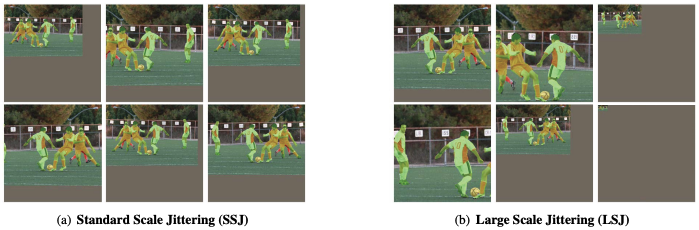


📝 Summary 📝 
- Scaling allows the model to learn from different sizes of objects in the scene, therefore increasing its robustness to generalize especially on newer scenes or object sizes.
- The Standard Scale Jitter (SSJ) range is \[0.8,1.25\].
- Ghiasi, et al. recommends a scale jitter range of \[0.1; 0.2\] (called Large Scale Jitter (LSJ) along with the Copy-Paste augmentation.[3](#ref3)

<a id="scale_jitter_lo"></a>
<a id="scale_jitter_up"></a>
### 3.1.A.a-b `scale_jitter_lo` and `scale_jitter_up`
During training, each image is randomly scaled within the range `[scale_jitter_lo, scale_jitter_up]` to augment training data. The default values for these two parameters are:
- `scale_jitter_lo = 0.5`
- `scale_jitter_up = 1.25`

💡Pro-tips:💡
- ⭐⭐⭐ If the target animal/s do not have an incredibly high variance in size throughout the video (e.g. jumping or moving towards the static camera), keeping the **default** values **unchanged** is **enough** ✅ because the lowest scale jitter value by default is 50% of the original image and the largest scale jitter value by default is 125% of the original image.

- ⭐⭐However, you may want to adjust these parameters if you want your model to:
  - handle new data with possibly **larger (25% bigger than original)** animal subjects ➡️ in this scenario, increase the value of *scale_jitter_up*
  - handle new data with possibly **smaller (50% smaller than the original)** animal subjects ➡️ in this scenario, decrease the value of *scale_jitter_lo*
  - **generalize well in new set-ups/environments** with minimal to no pre-training
  ⚠️ But as a consequence, **training time will take longer**.😔🕒
- ⭐If you have a fully static camera set-up and the sizes of the animals do not vary much, you may also try to **shorten** this range to **reduce training time**.😃🕒(⚠️ but, as a consequence, your model might only fit your data and not generalize well)

### 3.1.B *Rotation*
<a id="rotation"></a>
*Rotation augmentations* are done by rotating the image right or left on an axis between $1^{\circ}$ and $359^{\circ}$. Te safety of rotation augmentations is heavily determined by the rotation degree parameter. Slight rotations such as between $+1^{\circ}$ and $+20^{\circ}$ or $-1^{\circ}$ to $-20^{\circ}$ is generally an acceptable range. Keep in mind that as the rotation degree increases, the label of the data is no longer preserved post-transformation.

The image below retreived from [2](#ref2) illustrates the difference between the different rotation degrees.
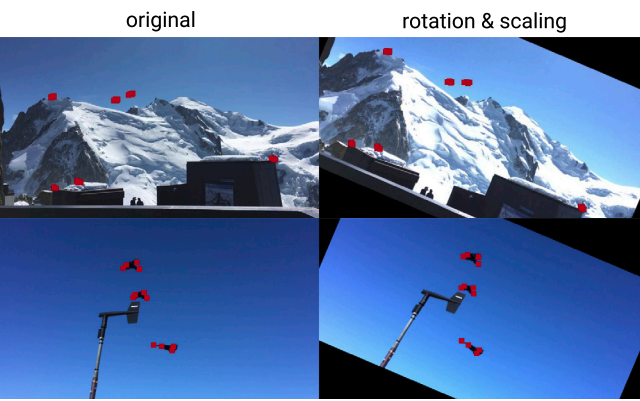

<a id="rot"></a>
### 3.1.B.a `rotation`
During training, each image is rotated $+/-$ the `rotation` degree parameter set. By default, this parameter is set to `25`, which means that the images are augmented with a $+25^{\circ}$ rotation of itself and a $-25^{\circ}$ degree rotation of itself. Should you want to opt out of this augmentation, set the rotation value to `False`.

💡Pro-tips:💡
- ⭐If you have labelled all the possible rotations of your animal/s, keeping the **default** value **unchanged** is **enough** ✅ 

- However, you may want to adjust this parameter if you want your model to:
  - handle new data with new rotations of the animal subjects 
  - handle the possibly unlabelled rotations of your minimally-labelled data 
    - But as a consequence, **the more you increase the rotation degree, the more the original keypoint labels may not be preserved**

### 3.1.B.b `rotratio` (rotation ratio)
<a id="rotratio"></a>
This parameter in the DLC module is given by the percentage of sampled data to be augmented from your training data. The default value is set to `0.4` or $40\%$. This means that $40\%$ of the training data is collected randomly for rotation augmentation.

💡Pro-tip:💡
- ⭐ Generally, keeping the **default** value **unchanged** is **enough** ✅ 

### 3.1.C `mirror` (or a horizontal flip)
<a id="mirror"></a>
**Mirroring** or otherwise called **horizontal axis fipping** is much more common than fipping the vertical axis. This augmentation is one of the easiest to implement and has proven useful on datasets such as CIFAR-10 and ImageNet. However, on datasets involving text recognition such as MNIST or SVHN, this is not a label-preserving transformation.

The image below is an illustration of this property (shown on the right most column).
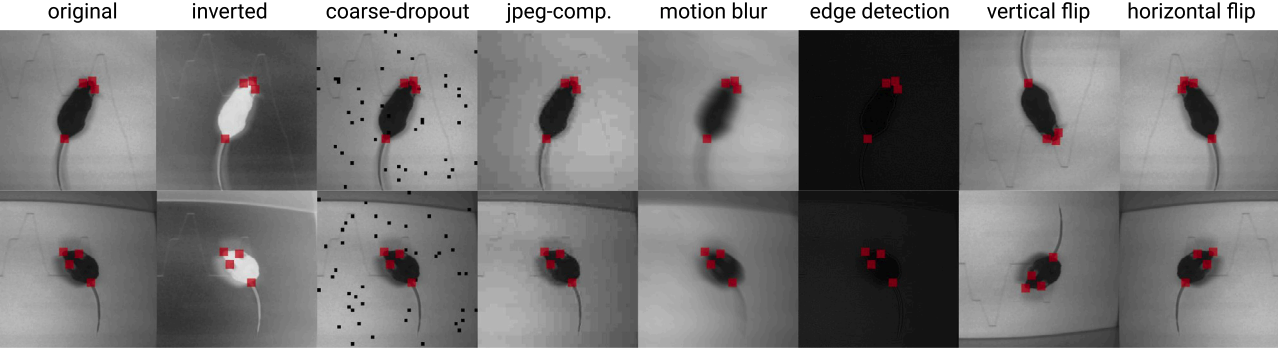

This parameter randomly flips an image horizontally to augment training data.
By default, this parameter is set to `False` especially on poses with mirror symmetric joints (for example, so the left  hand and right hand are not swapped).

💡Pro-tip:💡
- ⭐ If you work with labels with symmetric joints, keep the **default** value **unchanged**.✅
- Keeping the default value to `False` will work well in most cases.

### 3.1.D *Cropping*
<a id ="crop"></a>

Cropping consists of removing unwanted pixels from the image, thus selecting a part of the image and discarding the rest, reducing the size of the input. 

### 3.1.D.a `crop_size`
<a id ="cropsize"></a>

In DeepLabCut *pose_config.yaml* file, by default ```crop_size``` is set to (```400,400```), width and height respectively. This means it will crop a set of images getting a size of 400,400 width and height respectively. 

💡Pro-tip:💡
 - If your images are very large, you could consider increasing the crop size. However, be aware that you'll need a strong GPU or you will hit memory errors!
 - If your images are very small, you could consider decreasing the crop size. 

### 3.1.D.b `crop_ratio`
<a id ="cropratio"></a>

 Also, the number of frames to be cropped is defined by the variable ```cropratio```, which by default is se to ```0.4```. That means that, from the set of frames, the 40% will be randomnly selected to crop for data augmentation. By default this value works well. 
 
 
### 3.1.D.c `max_shift`
<a id ="maxshift"></a>

 The cropp shift between each cropped image is defined by ```max_shift``` variable, which explains the max relative shift to the position of the crop centre. By default is set to ```0.4```, which means it will be displaced 40% max from the center of each crop. You'll get one cropped image and the next crop would move max 40% from the previous one. 
 
The image below is modified from [2](#references). 
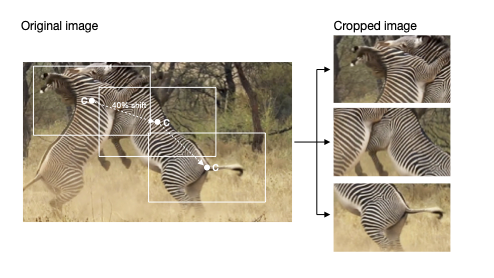

### 3.1.D.d `crop_sampling`
<a id ="cropsampling"></a>

 Likewise, there are different cropping sampling methods (```crop_sampling```), we can use depending on how our image looks like. 

💡Pro-tips💡
- If your keypoints are restricted to one region of the image, you might want to use the variants ```keypoints``` or ```dentisy```. 
- If your animal moves along the whole plane, you could be interested on crop samples uniformly, ```uniform```. 
- You can use an ```hybrid``` method, which means 50% ```density``` and ```uniform```. This is the method chosen by default. 


## 3.2 Kernel filters 
<a id ="kernel"></a>

### What are kernel filters?
Kernel filters are very popular in image processing to sharpen and blur images. Intuitively, blurring an image might increase the motion blur resistance during testing. Otherwise, sharpening for data enhancement could result in capturing more detail on objects of interest.

### 3.2.1 Sharpening: 
<a id ="sharp"></a>

In DeepLabCut *pose_config.yaml* file, by default ```sharpening``` is set to ```False```, but if we want to use this type or data augmentation, we can set it ```True``` and specify a value for ```sharpenratio```, which by default is set to ```0.3```. Blurring is not defined in the *pose_config.yaml*, but if the user finds it convenient, it can be added to add data augmentation. 

The image below is modified from [2](#references). 
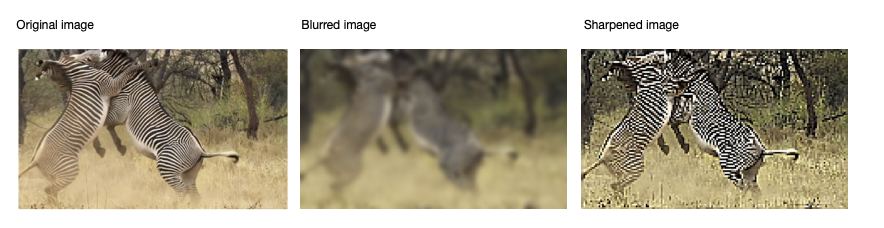

### 3.2.2 Edge: 
<a id ="edge"></a>

Concerning sharpeness, we have an additional parameter, ```edge``` enhancement, which enhances edge contrast of an image to improve its apparent sharpness. Likewise, by default this parameter is set ```False```, but if you want to include it you just need to set it ```True```.


# References 
<ol id="references">
    We report here relevant references:
    <li id="ref1">Shorten, C., & Khoshgoftaar, T. M. (2019). A survey on Image Data Augmentation for Deep Learning. In Journal of Big Data (Vol. 6, Issue 1). Springer Science and Business Media LLC. <a href="https://doi.org/10.1186/s40537-019-0197-0">https://doi.org/10.1186/s40537-019-0197-0</a> </li>
    <li id="ref2">Mathis, A., Schneider, S., Lauer, J., & Mathis, M. W. (2020). A Primer on Motion Capture with Deep Learning: Principles, Pitfalls, and Perspectives. In Neuron (Vol. 108, Issue 1, pp. 44-65). Elsevier BV. <a href="https://doi.org/10.1016/j.neuron.2020.09.017">https://doi.org/10.1016/j.neuron.2020.09.017</a></li>
    <li id="ref3">Ghiasi, G., Cui, Y., Srinivas, A., Qian, R., Lin, T.-Y., Cubuk, E. D., Le, Q. V., & Zoph, B. (2020). Simple Copy-Paste is a Strong Data Augmentation Method for Instance Segmentation (Version 2). arXiv. <a href="https://doi.org/10.48550/ARXIV.2012.07177">https://doi.org/10.48550/ARXIV.2012.07177</a></li>
    
</ol>

